# ECON 490: Classification and Clustering Models 
* **Authors**: COMET Team (Colby Chambers, Jonathan Graves)
* **Last Update**: 18 October 2022 

---

### Prerequisites

* Introduction to Jupyter
* Introduction to R
* Introduction to Visualization
* Central Tendency

### Learning Outcomes

After completing this notebook, you will be able to:

* Understand clustering and its purpose through the common method of K-means clustering.
* Apply K-means clustering to predict rates of recidivism.

### References

* James, G., Witten, D., Hastie, T., & Tibshirani, R. _An Introduction to Statistical Learning: With Applications in R._ (2nd Ed.), Springer Texts in Statistics, 2021. https://www.statlearning.com/ 
* Angwin, J., Larson, S., Mattu, S., & Kirchner, L. (23 May 2016) Machine Bias.  _Propublica_. https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing.  Retrieved 18 October 2022. [Link to Propublica Data](https://github.com/propublica/compas-analysis)
* StatQuest: K-means clustering. https://www.youtube.com/watch?v=4b5d3muPQmA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=40
* Cluster-then-predict for classification tasks. https://towardsdatascience.com/cluster-then-predict-for-classification-tasks-142fdfdc87d6
* Ideal Choice for K. https://www.guru99.com/r-k-means-clustering.html

## Introduction 

Many statistical models deal exclusively with data that is quantitative (numerical) in nature.  For example, a comparison of means ($t$-test) might evaluate the difference in _average_ incomes of two groups: a quantitative measure.  However, many questions of interest involve trying to predict _qualitative_ outcomes: will a person be arrested or not? Which university degree will they pursue?  Answering these kinds of questions requires us to predict the qualities an individual will have, which in statistics is called **classification** (the process of placing observations into distinct categories based on certain traits).

To understand classification, it helps to first look at a numerical example with some simulated data. Run the code cell below to see an example.

In [1]:
set.seed(123)
setwd("C:/Users/Jonathan Graves/Documents/TLEF/Notebooks/econometrics/econ_adv/01_classification_clustering/")
source('01_classification_and_clustering_source.r')

# creating a random data set 
dataset <- simulate_data3(c(1,1),c(1.5,2),c(2,3))

# plotting the data points
ggplot(dataset, aes(x = x, y = y)) + geom_point()

ERROR: Error in setwd("C:/Users/Jonathan Graves/Documents/TLEF/Notebooks/econometrics/econ_adv/01_classification_clustering/"): cannot change working directory


In this case, we can see that our observations can be roughly classified in terms of values of $y$ centered around 1, 2, and 3 (or potentially "low", "medium" and "high" if these can be categorized in this way). We can make this classification even clearer with appropriate colours and linear boundaries separating our clusters.

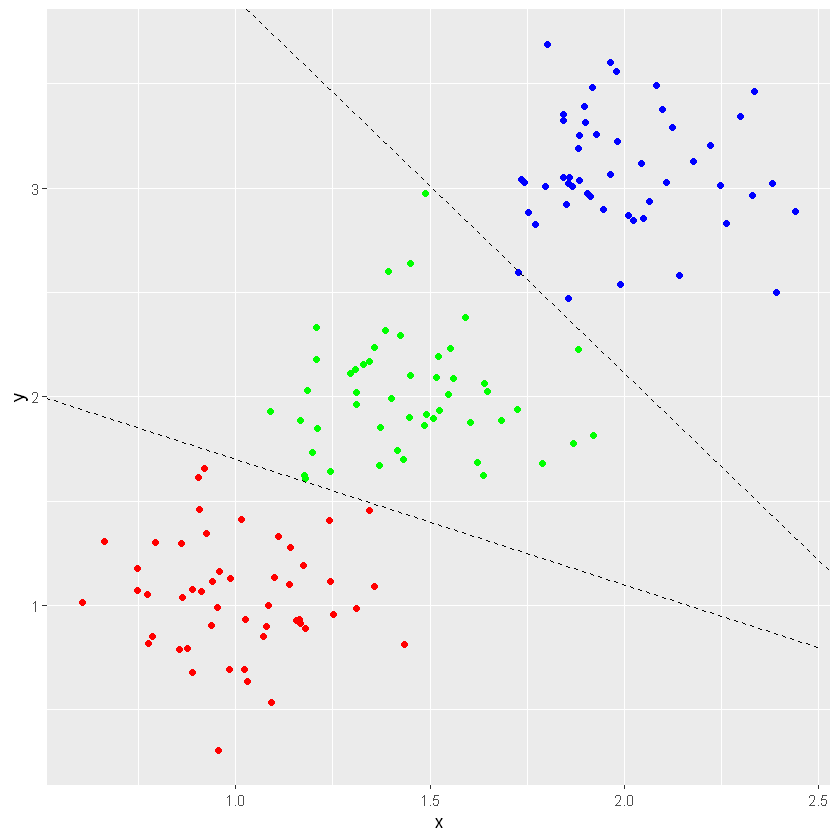

In [3]:
# graphing our clusters with colour and linear demarcations
ggplot(dataset, aes(x = x, y = y)) + geom_point(col = dataset$color) +
 geom_segment(x = 2.5, y = 0.8, xend = 0.5, yend = 2, linetype = "dashed") +
geom_segment(x = 0, y = 5.7, xend = 3.4, yend = -0.4, linetype = "dashed")

This is an early example of categorizing or classifying data. In this case, we found groups within our data manually, based on simply looking at the distribution of data points. We were even able to separate our data using lines - again a manual process. 

Often, however, our observations cannot be easily classified using a linear boundary that we can eye-ball. Instead, we may need to group our observations using more complicated functions. Even worse, sometimes we cannot observe how observations should be grouped by looking at them at all; observing the categorization of the data is part of the observation itself, making this an **unsupervised** classification task. 

We typically like to classify data using a more systematic approach. The process of finding groups, and then classifying observations as members of these groups, is called **clustering**. Once we have clustered our data, we can then interpret these clusters for meaning. Let's look at one of the most common methods of clustering used in machine learning below.

## $K$-means Clustering

One very popular approach to clustering is called **$K$-means clustering**. This approach is centered on the idea that "clusters" of similar observations should be close to one another in terms of their observable characteristics. This means that if we picture our clusters graphically, observations in the same cluster lie in a similar region in terms of the relevant observables we are measuring.  The $K$-means approach relies on the following step-by-step, iterative process:

1. Choose a value for $K$ (the number of clusters you want, a deceptively simple choice that we will come back to later).
2. Randomly select $K$ unique data points within your space of observations (from now on called cluster points).
3. Assign every data point to the nearest cluster point in Euclidean distance (creating $K$ large groups of points).
4. Calculate the mean point of each cluster group and redefine this mean point as the new clustering point (results in $K$ new cluster points).
5. Repeat 3-4 until all data points remain in the same cluster as the previous iteration (so that no data points move to new clusters).

We can see the following steps in an example below by using the `kmeans` function available to us in base R. This time, to demonstrate the strength of the algorithm, we will use a set of observations which cannot be easily categorized from a simple glance.

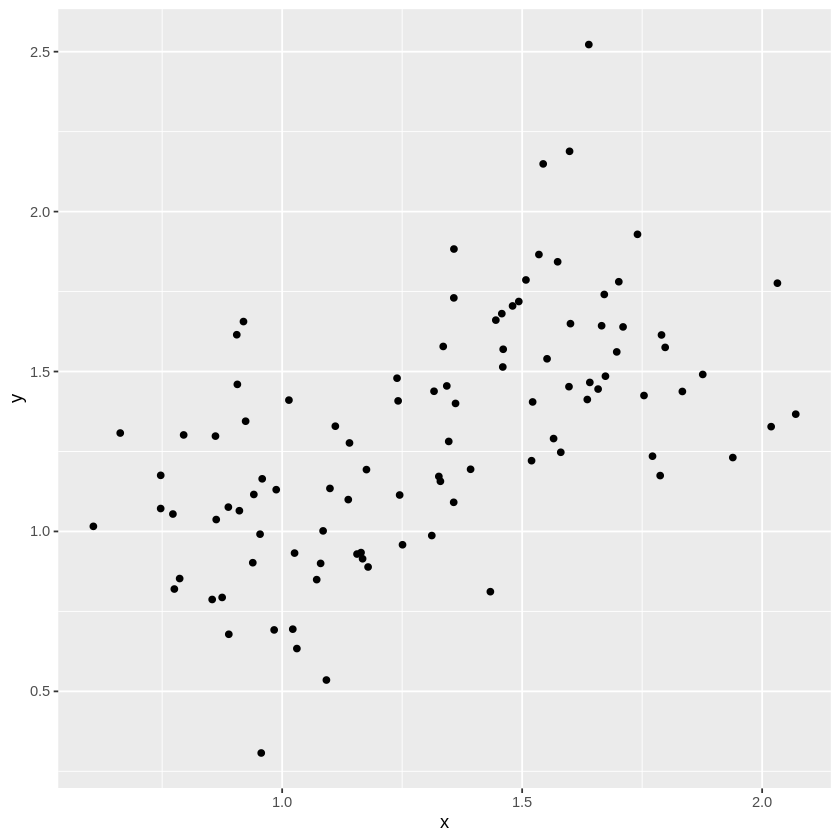

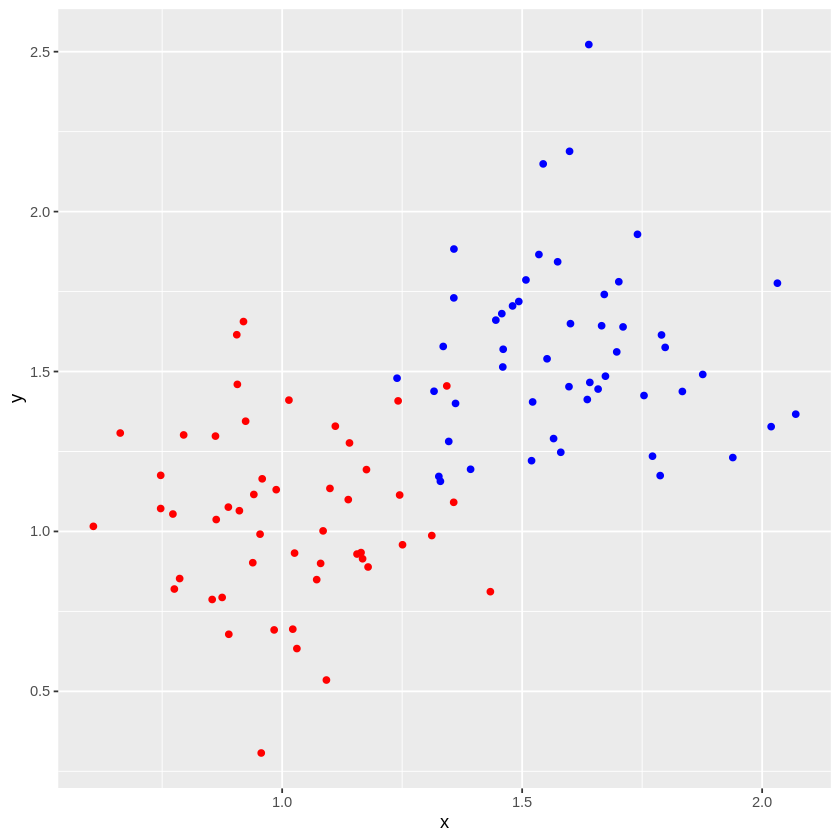

In [5]:
set.seed(123)

# creating a new and less easily classifiable set of data
dataset2 <- simulate_data2(c(1,1), c(1.65,1.55))

# visualizing the data
ggplot(dataset2, aes(x = x, y = y)) + geom_point()
ggplot(dataset2, aes(x = x, y = y)) + geom_point(color = dataset2$color)

We can see that the above data are not as easily classifiable as before. The `kmeans` function will now run the K-means clustering algorithm for us to cluster these 100 data points into $K$ groups. For now, we will choose to use $K = 2$ as our number of initial cluster points (number of eventual clusters). Remember, the algorithm will first choose the centers randomly within the dataset, then iterate.

K-means clustering with 2 clusters of sizes 51, 49

Cluster means:
         x        y
1 1.015846 1.036393
2 1.601977 1.580044

Clustering vector:
  [1] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1

Within cluster sum of squares by cluster:
[1] 5.225800 5.311684
 (between_SS / total_SS =  60.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

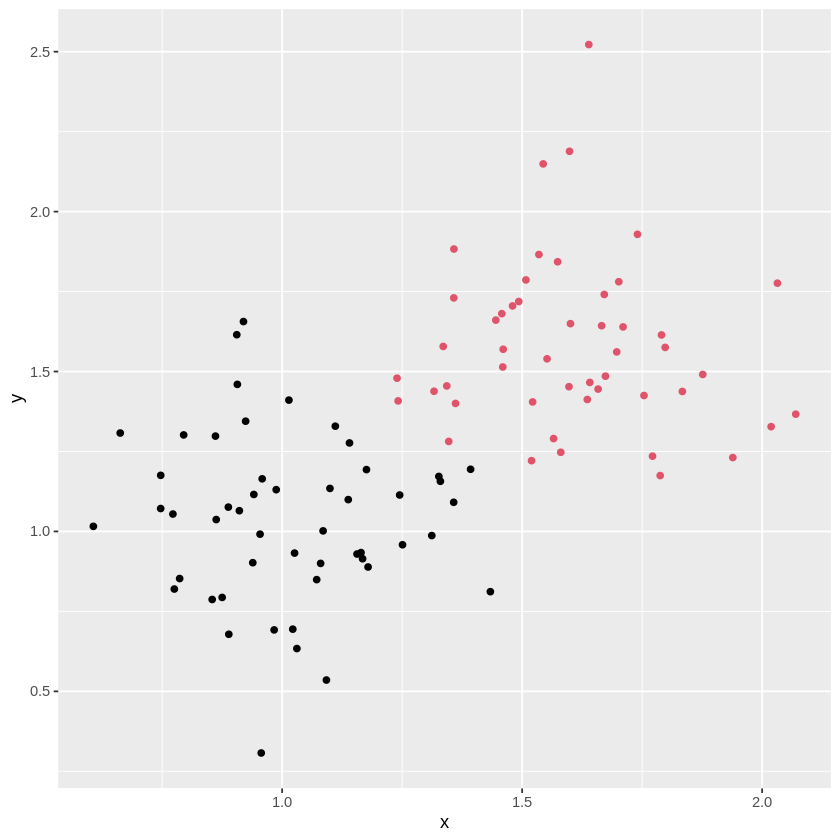

In [6]:
set.seed(123)

dataset3 <- within(dataset2, rm(color, cluster))
# running the kmeans function to cluster our data
basic_clusters <- kmeans(dataset3, 2)
basic_clusters

# visualizing the clustering of our data
ggplot(dataset3, aes(x = x, y = y)) + geom_point(col = basic_clusters$cluster)

We used the `$cluster` access above to assign colour to our data points, since this access assigns a value of 1 or 2 to each data point in every iteration depending on which of the current clusters it is in.

From the above, we can look at some useful properties of the _basic_clusters_ object we have created through use of the `kmeans` function. Firstly, the algorithm's iterative process led to clusters of 51 and 49 observations respectively. We can also see the suggested location of the centers for the cluster. Let's visualize this as well:

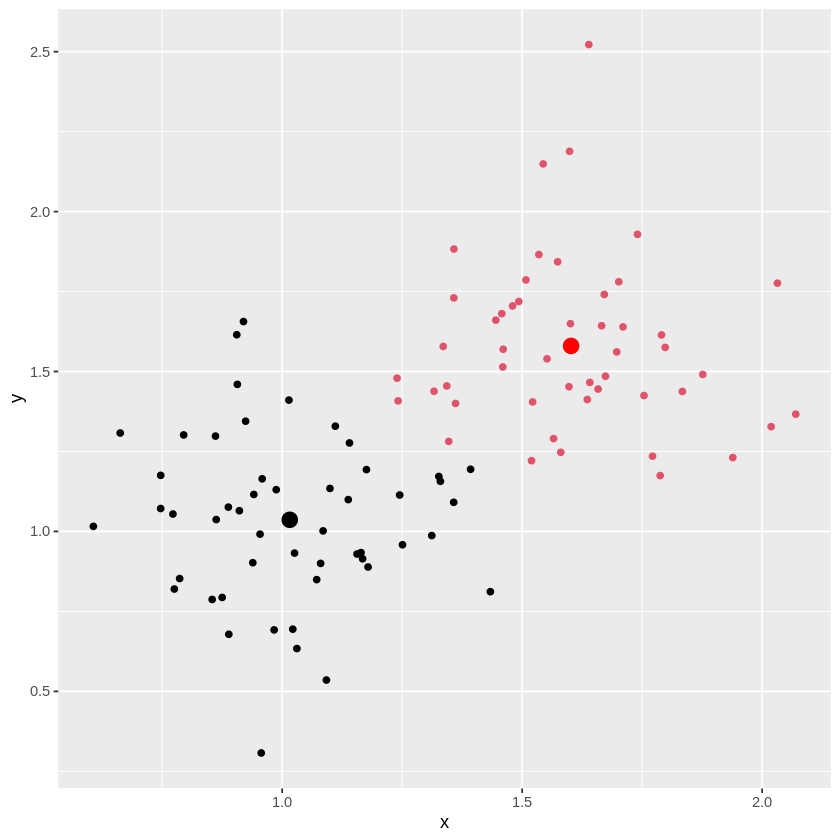

In [7]:
# visualizing our same data with final cluster points indicated
ggplot(dataset3, aes(x = x, y = y)) + geom_point(col = basic_clusters$cluster) + 
    geom_point(data = data.frame(basic_clusters$center), aes(x = x, y = y), col = c("black", "red"), size = 4) # new part for bolded points

Use the help menu (i.e. `kmeans?`) to see some of the additional values of the `kmeans` output that are available for analysis, such as the total variance, within cluster variance, and between cluster variance.

### How Close Did We Come?

If you remember, we simulated this data - we actually know the answer for where the "center" of the two clusters should be!  Let's check:

|         | $x_1$ | $y_1$ | $x_2$ | $y_2$ |
|---------|-------|-------|-------|-------|
| Cluster | 1.01  | 1.03  | 1.60  | 1.58  |
| Actual  | 1.00  | 1.00  | 1.65  | 1.55  |
| Error   | 1%    | 3%    | 3%    | 2%    |

Pretty close!  We can also see which points matched and which ones didn't.

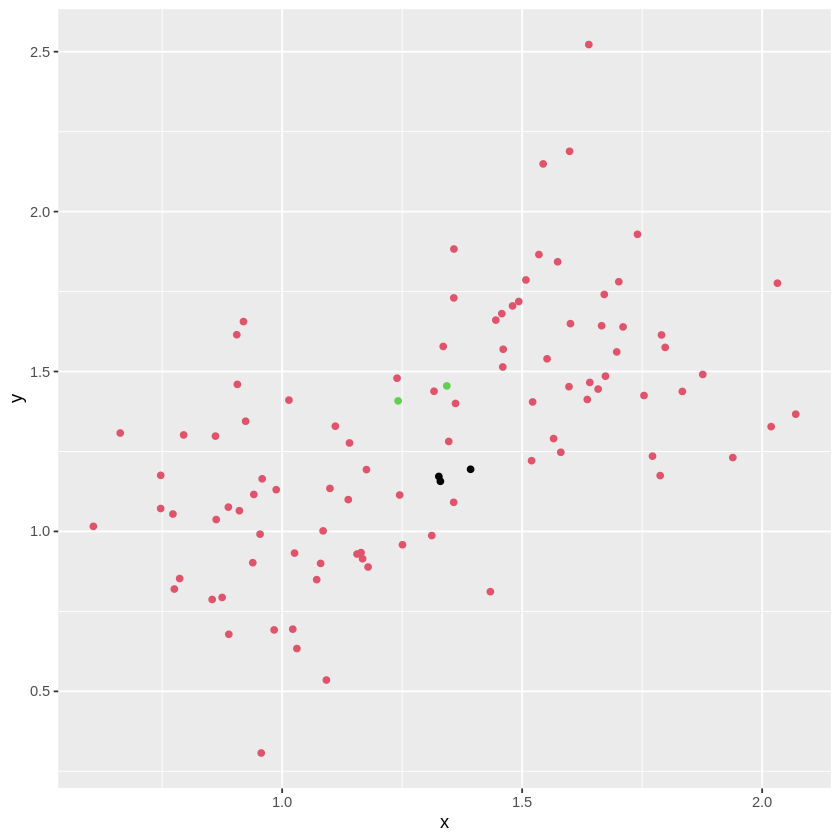

In [8]:
ggplot(dataset3, aes(x = x, y = y)) + geom_point(col = basic_clusters$cluster - dataset2$cluster + 2)

Red points are the points which were correctly assigned to their group.  The highlighted points are the ones the clustering algorithm got wrong: green points are ones which should have been in the lower group, but were assigned to the upper one.  Black points are ones which should have been in the upper group, but were assigned to the lower one.  There's only 5 errors total, resulting in an accuracy rate of 95%.  Pretty good!

> **Think About It**:  What do you think would happen if the clusters were closer together?  Further apart?  You can test your intution by changing the `mean` values in the cell earlier in this notebook (with 1.55 and 1.65)

## Key Issues in Clustering

Our `kmeans` function above appeared to pretty cleanly classify our 100 points into 2 groups. In applications, we can think of this as the algorithm taking the values of continuous variables for all available data points to create a categorical, or qualitative, variable with 2 distinct values, indicative of the three clustered groups found among all of our data. In this way, the algorithm can allow us to "find" groupings within our data that are not even apparent to us at first glance.

There are methods of clustering other than the $k$-means clustering technique, such as the hierarchical clustering technique mentioned earlier. However, the $k$-means approach is the most intuitive and by far most common technique used in machine learning to classify observations. Additionally, there are other versions of this algorithm which change how the cluster points (centers) are computed, such as using the `median` of all points within a cluster to find each cluster point; however, these approaches are conceptually similar to using the mean.

Importantly, you may be wondering what the end of goal of clustering actually is. We used the $k$-means algorithm to group our 100 observations into 2 clusters above, but how do we know whether this is a good classification? Are our results worthy of being presented, or is there a better way to cluster these points? Perhaps we can tweak our approach to get clusters which are compact, that is, clusters which don't have wide variation from their mean cluster point. This is where that seemingly arbitrary choice of $K$ from earlier comes in.

### Choosing $K$

Perhaps the most important decision when doing k-means clustering is the selection of $K$, the number of clusters. Choice of this value, while it may seem arbitrary, is actually critical in ensuring that our clustering is accurate. The goal when choosing a value for $K$ is to minimize the sum of within-cluster variation across all clusters. This means creating $K$ clusters so that the individual points within each cluster are as close to the center point of that cluster as possible. 

An extremely bad value for $K$ is 1. With one cluster, there is actually no clustering occurring at all, so the total variance of all data points from their mean value is as large as possible. Increasing the value of $K$ allows for an increasing number of clusters, so that all available data points are crowded into increasingly small groups with consistently shrinking variances. From this, it may seem that the ideal value for $K$ is $\infty$, infinite clusters! 

However, this introduces the problem of **overfitting**. If we have an extremely large number of clusters, this means that our $k$-means algorithm is working incredibly hard to adapt to the specific set of points we have. Unfortunately, this means that it will perform substantially worse when new data is added. To put it simply, the machine has adapted so well to the specific data points we have that it cannot flexibly adjust for new data! As a result, the ideal choice of K lies somewhere on $(1, \infty)$. The question is, how do we find it?

One very common approach for finding an optimal value for $K$ is to graph what is called an **Elbow Plot**. An Elbow Plot represents the relationship between the value of $K$ and the total within-cluster variance. This graph naturally decreases; as $K$ increases, the number of clusters is increasing and so the within-cluster variance is decreasing. However, it begins to generate diminishing marginal returns for a certain $K$, meaning that the benefits from a larger number of clusters (a decreasing total variance) begin to become smaller and smaller. It is at this point, where the diminishing marginal returns to $K$ set in, that we find our optimal $K$. Graphically, this at the point in our graph that looks like an "elbow", hence the name.

Let's define a simple function below to create an Elbow Plot, then use it to find the optimal value of $K$ for our clustering of `dataset2` above.

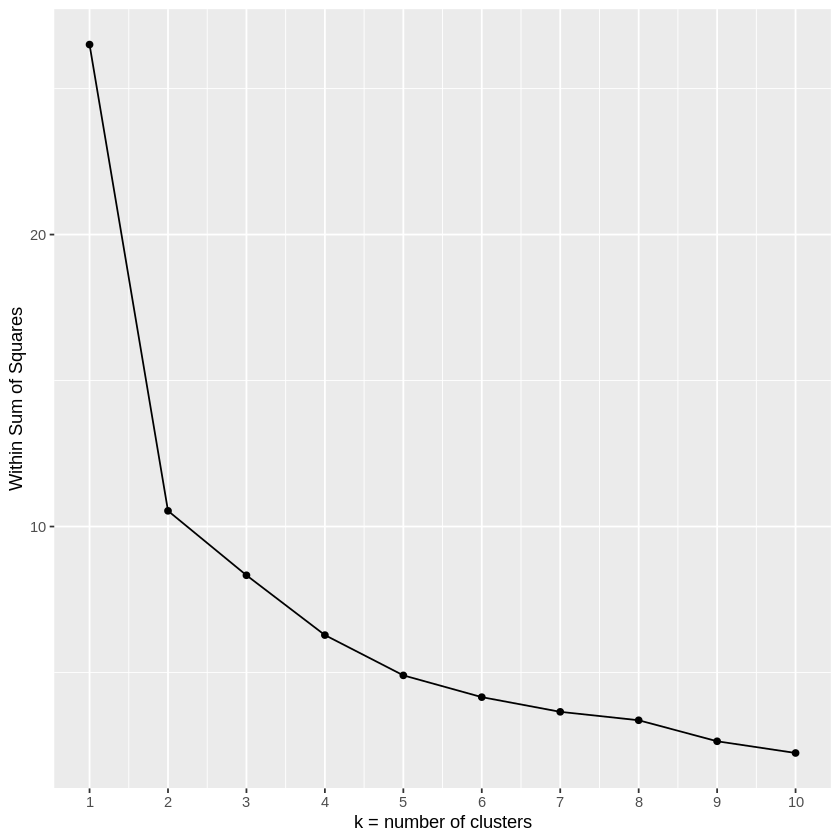

In [9]:
## draw it!
elbow_plot()

Using an Elbow Plot to choose a value for $K$ is always highly subjective. However, we can approximate from the above graph that the optimal $K$ is likely one of 2, 3, or 4. Let's choose 4, since this is where it most clearly looks like the graph is beginning to take on diminishing marginal returns.

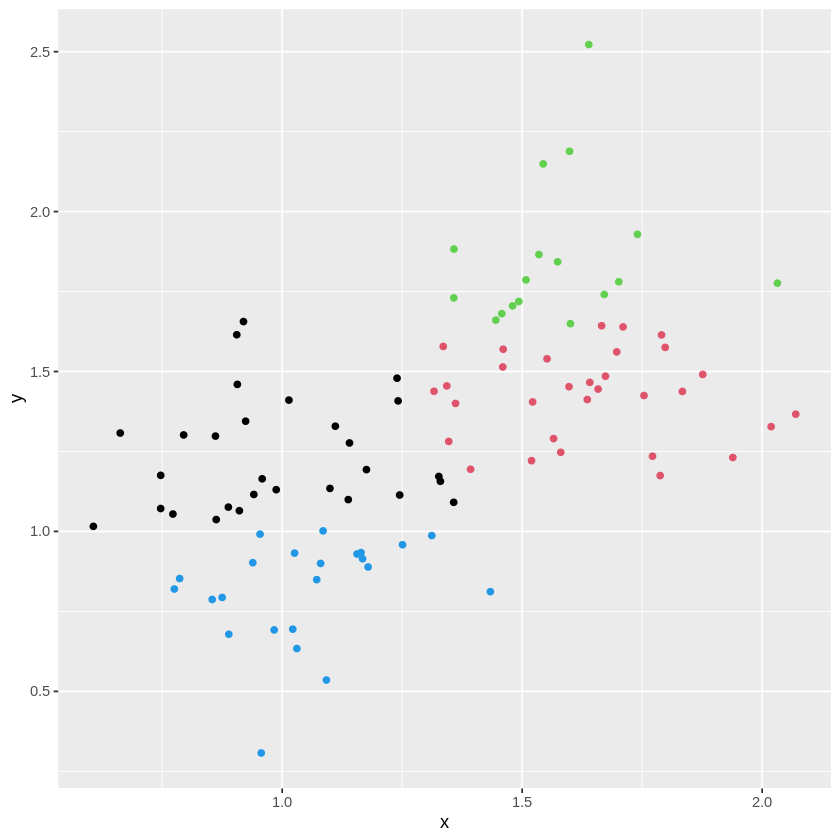

In [10]:
set.seed(123)
# running the kmeans function to cluster our data (now with k = 4)
basic_clusters <- kmeans(dataset3, 4)

# visualizing the clustering of our data
ggplot(dataset3, aes(x = x, y = y)) + geom_point(col = basic_clusters$cluster)

We now see that our data has been clustered into four groups instead of two. Is this better? It's hard to say!  This kind of learning is called **unsupervised** because, in general, we don't know what the right answer is.  We know there's only two groups here, but only because we simulated the data. Generally, we don't know the exact number of clusters that actually exist in our data.

There is plenty of room for personal discretion. Sometimes you just have to use your best judgment when choosing a value for $K$.

As a side-note, we generated this Elbow Plot by adapting the code from Andrea Gustafsen in her article on $K$-Means clustering (listed in the References section above). Whenever you are struggling to create a more complicated function, looking for help on the internet is a great idea! Just be sure to be prudent when you're reading others' code so that you can apply it to your situation accordingly. Also be sure to cite/credit them appropriately.

### Standardization

Another important issue in K-means clustering is standardizing distances. Often, a continuous variable will take on a range of values, some of which are very small and some of which are very large. These **outliers** can skew the calculation of our mean cluster point within each cluster. For this reason, we often standardize our data points to be distributed with a mean of 0 and standard deviation of 1 (the standard normal distribution) to reduce the impact of these outliers on calculations of our cluster points. This allows the algorithm to create clusters that are often more precise. Luckily for us, R has the `scale` function that we can invoke to achieve this. Let's use this function to standardize the data in our _dataset2_ dataframe, then use our `kmeans` function again with our new value of $K = 4$ to create some new clusters.

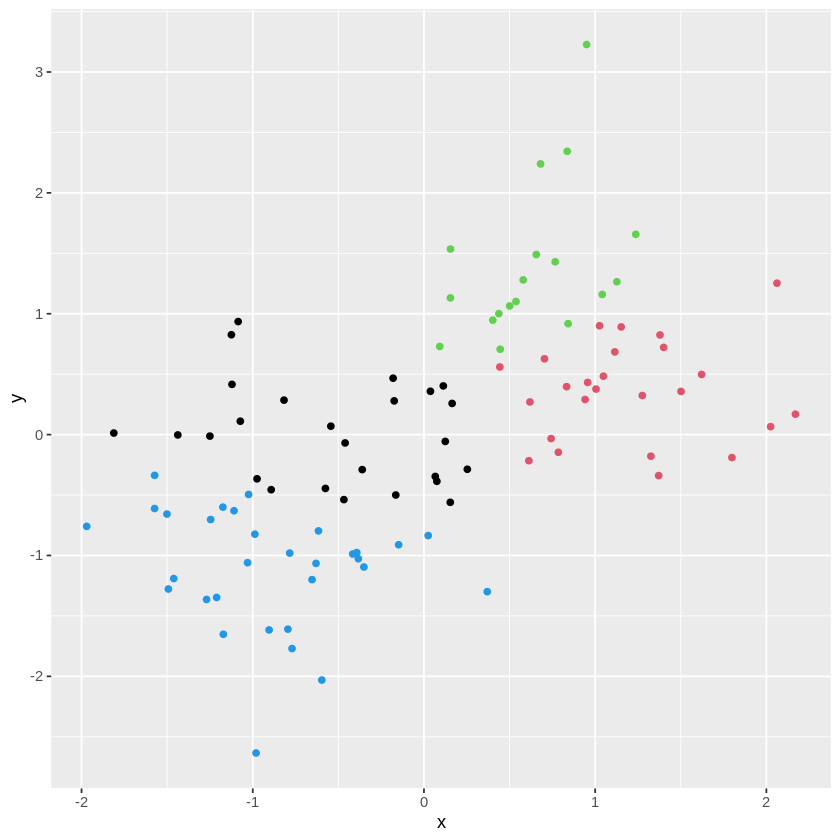

In [11]:
set.seed(123)

# standardizing all of our data points
dataset3 <- dataset3 %>% mutate(x = scale(x), y = scale(y))

# running our algorithm again
basic_clusters <- kmeans(dataset3, 4)

# generating our clusters
ggplot(dataset3, aes(x = x, y = y)) + geom_point(col = basic_clusters$cluster)

Now our clusters look to be more grouped in a top, middle, left and right region. This is indicative of the fact that, once standardized, points that were formerly extreme have a reduced effect on the calculation of mean cluster points at each step in the algorithm, allowing us to arrive at final clusters that look more precise. 

While all of our data was relatively compact in this example, in the real world we often work with data containing extreme outliers. When looking at income, for instance, there will be massive values for income which can skew our K-means clustering process by distorting the mean value within each cluster at every step in our algorithm. In these cases, standardizing can be a good idea.

## Application: Algorithmic Bias and Clustering

So far in this module, we've worked with simulated data. However, the $k$-means clustering approach can be applied to real-world data to help us find groups within our observations and even make predictions. To see this more closely, we will work with data from COMPAS, an American risk assessment program used primarily to predict the rate of recidivism of convicted felons based on a host of personal characteristics. The data below, cleaned and prepared by authors of the following [Github repo](https://github.com/propublica/compas-analysis), has been retrieved from [ProPublica](https://www.propublica.org/), an American company specializing in investigative journalism. This data set looks specifically at arrests in Broward County, Florida, since Florida has a breadth of open records available and all detainees in the county must complete the COMPAS risk assessment survey.

> **Reading**: before going further, [read the article](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)!

Firstly, let's import and prepare the data.

In [13]:
# reading in the data
raw_data <- read.csv("compas-scores-two-years.csv")

# cleaning up the data
raw_data <- clean_up_data(raw_data)

# inspecting the data
head(raw_data)

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,length_of_stay
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,69,F,Other,Greater than 45,Low,Male,0,-1,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,1
2,34,F,African-American,25 - 45,Low,Male,0,-1,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,10
3,24,F,African-American,Less than 25,Low,Male,4,-1,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1
4,44,M,Other,25 - 45,Low,Male,0,0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,1
5,41,F,Caucasian,25 - 45,Medium,Male,14,-1,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,6
6,43,F,Other,25 - 45,Low,Male,3,-1,4,0,0,2013-08-29 08:55:23,2013-08-30 08:42:13,1


In the COMPAS system, the idea is to predict who is likely to reoffend: the goal is to assign a person a rating of either **low**, **medium**, or **high** to represent their risk of recidivism.  We don't know exactly how the creators of COMPAS have done that since they have not specified their calculation mechanism, but we can apply the idea of clustering to see how they *might* have done it.

Let's do this by creating some dummies for the different categories, then creating three clusters.

> _Note_: Technically, we should probably use the $k$-medioids or $k$-modes algorithm here, but let's run with $k$-means since this is what we've learned!

In [14]:
set.seed(123)

# make dummies and select the variables to cluster on
cluster_data <- raw_data %>% select(age, is_recid, c_charge_degree, sex, priors_count)
cluster_data <- make_dummies(cluster_data)

# make the clusters
recidivism_clusters <- kmeans(cluster_data, 3)

#show the results
centers <- data.frame(recidivism_clusters$centers)

#adding some labels
centers$cluster <- c("medium", "high", "low")
centers <- centers %>% mutate(cluster_id = as.factor(cluster))

centers

,age,is_recid,c_charge_degree,sex,priors_count,cluster,cluster_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,36.59515,0.4780815,0.6467251,0.8019598,4.680248,medium,medium
2,25.12328,0.5515620,0.6711454,0.8132348,2.173665,high,high
3,53.66003,0.3351911,0.5716561,0.8128981,3.575637,low,low


As we can see, this has split the data into three groups, which differ in terms of their recidivism rate (`is_recid`).

* Cluster 1 ("medium") has a re-offense rate of about 48%
* Cluster 2 ("high") has a re-offense rate of about 55%
* Cluster 3 ("low") has a re-offense rate of about 34%

The other variables reflect the differences.  We can see most of them are not very influential, except `age` (decreases as re-offense rate increases) and `priors_count` (increases and then decreases as re-offense rate increases!). However, look at the racial makeup of the three groups.

In [15]:
raw_data$cluster <- recidivism_clusters$cluster

table <- raw_data %>%
    group_by(cluster) %>%
    summarize(
        black = mean(race == "African-American"),
        white = mean(race == "Caucasian"),
        other = mean(race == "Other")
    )

table$cluster_name <- c("medium", "high", "low")

table

cluster,black,white,other,cluster_name
<int>,<dbl>,<dbl>,<dbl>,<chr>
1,0.5110882,0.3347086,0.05621454,medium
2,0.5824656,0.2818273,0.05340947,high
3,0.3582803,0.4896497,0.05971338,low


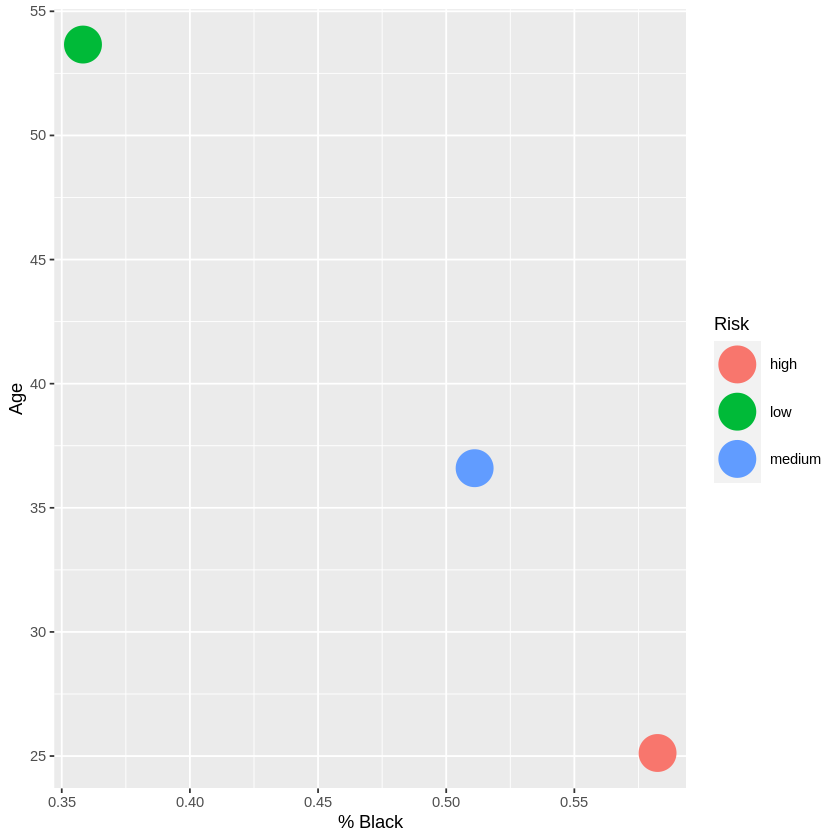

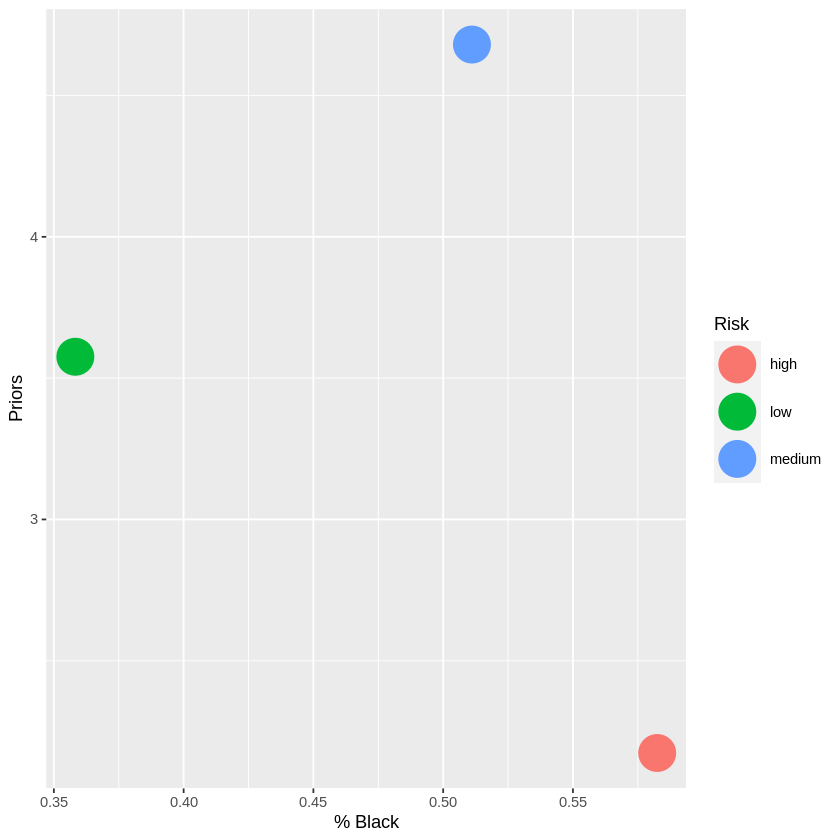

In [16]:
ggplot(data = centers, aes(x = table$black, y = age, color = table$cluster_name)) + geom_point(size = 10) + 
labs(x = "% Black", y = "Age", color = "Risk")

ggplot(data = centers, aes(x = table$black, y = priors_count, color = table$cluster_name)) + geom_point(size = 10) + 
labs(x = "% Black", y = "Priors", color = "Risk")

Being young and black makes you very likely to be in the "high risk" category - paradoxically, even if you have _few_ prior offenses.  This matches many of the paradoxical conclusions the ProPublica team found in their analysis:

> James Rivelli [Caucasian], a 54-year old Hollywood, Florida, man, was arrested two years ago for shoplifting seven boxes of Crest Whitestrips from a CVS drugstore. Despite a criminal record that included aggravated assault, multiple thefts and felony drug trafficking, the Northpointe algorithm classified him as being at a low risk of reoffending. [...] Less than a year later, he was charged with two felony counts for shoplifting about $1,000 worth of tools from Home Depot

On the other hand, Brisha Borden, an 18-year old African American, with no prior offenses was rated a high-risk to re-offend.

Based on our clustering analysis, can you see why?  

### Think Critically

What is this algorithm picking up?  It's likely a complex combination of a couple of things:

* Black individuals may be more likely to be arrested or criminally charged than white individuals, conditional on other relevant characteristics. This may be especially true when comparing young black individuals and old white individuals. This creates an algorithmic association with age and race, in addition to an associated between race and re-arrest. However, age has a strongly negative relationship with reoffense _and_ a strong positive relationship with priors. Older people have less time to reoffend and have had more time to incur priors; this creates the paradoxical negative relationship described.
  
In other words, the system is likely picking up **existing cultural** relationships, rather than any true causal relationship.   This may be why Propublica found:

>[S]ignificant racial disparities ... in forecasting who would re-offend, the algorithm made mistakes with black and white defendants at roughly the same rate but in very different ways.
>
> * The formula was particularly likely to falsely flag black defendants as future criminals, wrongly labeling them this way at almost twice the rate as white defendants.
> * White defendants were mislabeled as low risk more often than black defendants.

This is called **algorithmic bias**: the algorithm is innately biased against black defendants.  You will notice this is _despite the fact_ that race was never used in the construction of the clusters. The bias notably arises from the relationship race has with _other factors_ in the model.



Moreover, it's highly dependent on the algorithm used. Let's try a different model (called _linear probability_):

In [17]:
model <- lm(is_recid ~ c_charge_degree + race + age + priors_count + sex, data = raw_data)
stargazer(model, type = "text")


                         Dependent variable:    
                     ---------------------------
                              is_recid          
------------------------------------------------
c_charge_degreeM              -0.043***         
                               (0.013)          
                                                
raceAfrican-American           0.025*           
                               (0.014)          
                                                
raceAsian                      -0.073           
                               (0.083)          
                                                
raceHispanic                  -0.051**          
                               (0.023)          
                                                
raceNative American            -0.007           
                               (0.139)          
                                                
raceOther                      -0.051*          
                   

We can notice that `raceAfrican-American` has a very small coefficient - this indicates that there is a very small impact of being black; in fact, it is not statistically significant at the 95% level. This model is not particularly biased against black individuals - and it correctly assigns a higher rating to people with more priors.

This lesson illustrates the challenge of making predictions about individuals based on patterns in larger groups they belong to: it is likely that these predictive measures will misrepresent some individuals' circumstances. This has applications to many debates beyond just how to predict recidivism. Affirmative action, which is often grounded in predicting the material circumstances of individuals by their racial background, is just one such example. When designing prediction mechanisms for individuals based on group patterns, these practical and moral concerns should be taken seriously.

## Conclusion

In this module, we looked at the process of clustering and how it can be used to classify observations. Specifically, we started with a general explanation of how clustering works, then worked more closely with the $K$-means clustering algorithm, the most common and basic clustering method available. We saw the importance of standardizing our observations and choosing the appropriate value for $K$ when using this model. 

Then, we applied what we learned from this algorithm to make predictions about rates of recidivism among various populations, comparing our predictions to actual recidivism rates and the accuracy of the COMPAS risk assessment tool.  We have learned that - while a powerful tool - we need to think very critically about exactly what it is doing, and whether our model makes sense.  Is it studying something fundamental, or is it just re-enforcing existing biases and patterns?

It is important to remember that the $K$-means clustering algorithm is just one of many clustering algorithms out there. Its benefit lies in its simplicity. However, its main drawback is the requirement to choose a value for $K$, which can often be quite subjective. Other clustering methods exist which automatically find an optimal number of clusters for us. This is especially useful when we are doing unsupervised learning and looking for latent patterns in our data, patterns that we cannot see from just the observations themselves. If you want to look at brief overviews of some of these algorithms and their benefits/drawbacks, don't hesitate to consult the [following resource](https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/).

### Addendum

Some [food for thought](http://smbc-comics.com/comic/rise-of-the-machines).

## Exercises

### Exercise 1

In this analysis, we only looked at black and white individuals (mainly to match the results).  However, the data _also_ contained information about other races.  Consider the table below, which shows the average of several of the key variables we clustered on.  Based on this table, hypothesize which groups would be _least_ likely to be classified as high-risk.

In [25]:
table <- raw_data %>%
    group_by(race) %>%
    summarize(
        mean_age = mean(age),
        mean_priors = mean(priors_count),
        frac_male = mean(sex == "Male"),
        charge_felony = mean(c_charge_degree == "F")
    )

table

race,mean_age,mean_priors,frac_male,charge_felony
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Caucasian,37.49073,2.289111,0.7708036,0.5915359
African-American,32.43496,4.238110,0.8270866,0.6916535
Asian,38.22581,1.354839,0.9354839,0.6129032
Hispanic,35.01965,2.100196,0.8388998,0.5717092
Native American,33.18182,5.181818,0.8181818,0.6363636
Other,34.83382,1.746356,0.8309038,0.6209913


<span style="color: red;">Write your answer and reasoning here:

### Exercise 2

The COMPAS system produces both a code (low, medium, high) for risk, and a numerical measure.  One way of thinking about such a numerical measure is that it's a clustering process with a very high $K$.

* Why do you think that in the sentencing recommendations they focused on the code, and not the measure?
* Do you think the numerical measure is immune to algorithmic bias or not?

<span style="color: red;">Write your answer and reasoning here:

### Exercise 3

According to our linear probability model, which characteristics are strong predictors of an individual's likelihood to reoffend? Would you use any of these characteristics to partially decide one's sentence? If so, which ones and why?

<span style="color: red;">Write your answer and explain your thought process here:

### Exercise 4

In machine learning, we often like to split our dataset up into two mutually exclusive and collectively exhaustive groups: training and testing samples. We use the training sample to train our classification (creation of our model), then use the testing sample to ensure that this classification has good external validity (cross-validation of our model). This allows us to construct a good classification initially while also guarding against this initial classification being over-fitted to our chosen group of data. In the case of $k$-means clustering specifically, this hinges on the choice of $K$ that we make.

Consider three choices of $K$ used to cluster points in a dataset, with training and testing subsamples randomly chosen from the data to maximize the accuracy of our classification procedure. <br>
- __A__: $K = 2$ <br>
- __B__: $K = 5$ <br>
- __C__: $K = 10$

Assume that the distribution of points in our overall dataset looks roughly similar to those we have seen in this module.

Which of the following choices of $K$ is most likely to create a classification that clusters our training data with poor accuracy?

In [24]:
answer_1 <- "X" # your answer of A, B, or C in place of X here

test_1()

Test passed 🎉
[1] "Success!"


Which of the following choices of $K$ is most likely to create a classification that clusters our training data with high accuracy but our testing data with low accuracy?

In [25]:
answer_2 <- "X" # your answer of A, B, or C in place of X here

test_2()

Test passed 😸
[1] "Success!"


Which of the following choices of $K$ is most likely to create a classification that clusters our training data with high accuracy and has high external validity?

In [26]:
answer_3 <- "X" # your answer of A, B, or C in place of X here

test_3()

Test passed 🥳
[1] "Success!"
